In [80]:
import cv2
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt

image_row = 120
image_col = 120

# visualizing the mask (size : "image width" * "image height")
def mask_visualization(M):
    mask = np.copy(np.reshape(M, (image_row, image_col)))
    plt.figure()
    plt.imshow(mask, cmap='gray')
    plt.title('Mask')

# visualizing the unit normal vector in RGB color space
# N is the normal map which contains the "unit normal vector" of all pixels (size : "image width" * "image height" * 3)
def normal_visualization(N):
    # converting the array shape to (w*h) * 3 , every row is a normal vetor of one pixel
    N_map = np.copy(np.reshape(N, (image_row, image_col, 3)))
    # Rescale to [0,1] float number
    N_map = (N_map + 1.0) / 2.0
    plt.figure()
    plt.imshow(N_map)
    plt.title('Normal map')

# visualizing the depth on 2D image
# D is the depth map which contains "only the z value" of all pixels (size : "image width" * "image height")
def depth_visualization(D):
    D_map = np.copy(np.reshape(D, (image_row,image_col)))
    # D = np.uint8(D)
    plt.figure()
    plt.imshow(D_map)
    plt.colorbar(label='Distance to Camera')
    plt.title('Depth map')
    plt.xlabel('X Pixel')
    plt.ylabel('Y Pixel')

# convert depth map to point cloud and save it to ply file
# Z is the depth map which contains "only the z value" of all pixels (size : "image width" * "image height")
def save_ply(Z,filepath):
    Z_map = np.reshape(Z, (image_row,image_col)).copy()
    data = np.zeros((image_row*image_col,3),dtype=np.float32)
    # let all point float on a base plane 
    baseline_val = np.min(Z_map)
    Z_map[np.where(Z_map == 0)] = baseline_val
    for i in range(image_row):
        for j in range(image_col):
            idx = i * image_col + j
            data[idx][0] = j
            data[idx][1] = i
            data[idx][2] = Z_map[image_row - 1 - i][j]
    # output to ply file
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(data)
    o3d.io.write_point_cloud(filepath, pcd,write_ascii=True)

# show the result of saved ply file
def show_ply(filepath):
    pcd = o3d.io.read_point_cloud(filepath)
    o3d.visualization.draw_geometries([pcd])

# read the .bmp file
def read_bmp(filepath):
    global image_row
    global image_col
    image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    image_row, image_col = image.shape
    return image

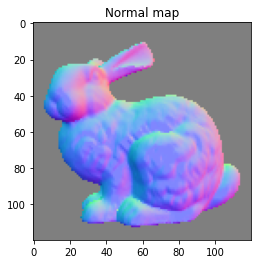

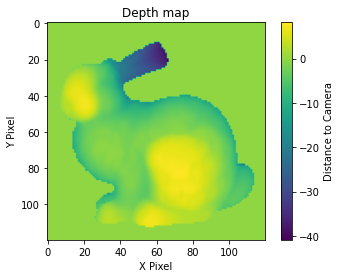

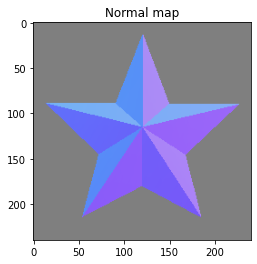

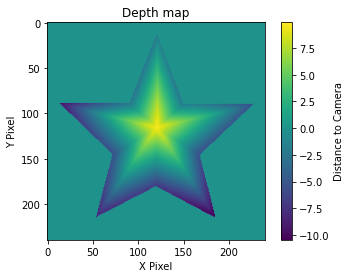

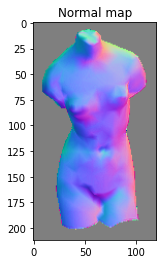

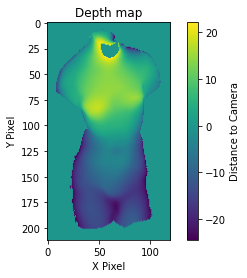

In [81]:
test_case_list = ['bunny', 'star', 'venus']

for test_case in test_case_list:
    read_bmp(f'./test/{test_case}/pic1.bmp')

    normal_map = np.load(f'./answer/{test_case}/normal_map.npy')
    normal_visualization(normal_map)

    depth_map = np.load(f'./answer/{test_case}/depth_map.npy')
    depth_visualization(depth_map)

    show_ply(f'./answer/{test_case}/pc.ply')